<a href="https://colab.research.google.com/github/Amir-h055/Image-Procccessing/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install -q -U keras-tuner

In [5]:
#Connecting to GitHub
import os
import glob
import shutil
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import cv2

%tensorflow_version 2.x 
# TensorFlow and tf.keras
import tensorflow as tf
import seaborn as sns
from fastai.vision import *
from numpy.ma.core import size
from fastai.vision.data import ImageDataBunch
from fastai.vision.transform import get_transforms
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, BatchNormalization
from sklearn.metrics import classification_report, plot_confusion_matrix

import keras_tuner as kt
from keras_tuner import RandomSearch

from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.model_selection import train_test_split
import time


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
path ='/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data'
train_directory = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train'
test_directory = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/test'
validation_directory = r'/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation' 

In [8]:
SIZE = 140
BATCH_SIZE = 64
TARGET_SIZE = (SIZE,SIZE)
EPOCH_NUM = 10

In [9]:
categories_dict = {
  0: "COVID19",
  1: "NORMAL",
  2: "PNEUMONIA",
  
}

In [ ]:
image_gen = keras.preprocessing.image.ImageDataGenerator(
                                  rescale = 1./255,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                              horizontal_flip = True, 
                               )
image_split_train_validation = keras.preprocessing.image.ImageDataGenerator(
                                  validation_split = 0.2
                               )


#Do NOT RUN THIS


###Seperating Image into Training Dataset and Validation Dataset




In [ ]:
# train = image_split_train_validation.flow_from_directory(
#     train_directory,
#     subset = "training"
#     )
# validation = image_split_train_validation.flow_from_directory(
#     train_directory,
#     subset = "validation"
#     )

Found 4116 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.


In [ ]:
# train.class_indices

{'COVID19': 0, 'NORMAL': 1, 'PNEUMONIA': 2}

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Inital Training Dataset')]

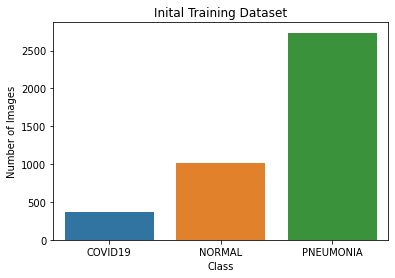

In [ ]:
# image_labels = []
# for  label in train.classes:
#   image_labels.append(categories_dict[label])

# df = pd.DataFrame(image_labels)
# sns.countplot(x=0, data= df).set(Title='Inital Training Dataset', xlabel='Class', ylabel='Number of Images')

#DO NOT RUN THIS


### Moving The Validation X-Rays To Validation Folder



In [ ]:
# if not os.path.exists(validation_directory):
#     os.makedirs(validation_directory)
    
# if not os.path.exists(validation_directory +"/COVID19"):
#     os.makedirs(validation_directory +"/COVID19")

# if not os.path.exists(validation_directory +"/NORMAL"):
#     os.makedirs(validation_directory +"/NORMAL")

# if not os.path.exists(validation_directory +"/PNEUMONIA"):
#     os.makedirs(validation_directory +"/PNEUMONIA")

# for i, label in enumerate(validation.classes):
#   if not os.path.exists(validation_directory+"/"+validation.filenames[i]):
#     if label == 0:
#       shutil.move(validation.filepaths[i], validation_directory+"/"+validation.filenames[i])
#     if label == 1:
#       shutil.move(validation.filepaths[i], validation_directory+"/"+validation.filenames[i])
#     if label == 2:
#       shutil.move(validation.filepaths[i], validation_directory+"/"+validation.filenames[i])



###Fetching Validation X-Rays From New Directory 


In [ ]:
validation = image_gen.flow_from_directory(validation_directory)

Found 1028 images belonging to 3 classes.


###Fetching Training X-Rays From New Directory 


In [ ]:
train = image_gen.flow_from_directory(train_directory)

Found 4116 images belonging to 3 classes.


###Some X-Rays Images

In [ ]:
tfms = get_transforms (do_flip=True, max_rotate=10.0);
dataTrain = ImageDataBunch.from_folder(path, train='train', size=2000);

/usr/local/lib/python3.7/dist-packages/fastai/data_block.py:461: UserWarning: Your validation set is empty. If this is by design, use `split_none()`
                 or pass `ignore_empty=True` when labelling to remove this warning.
  or pass `ignore_empty=True` when labelling to remove this warning.""")


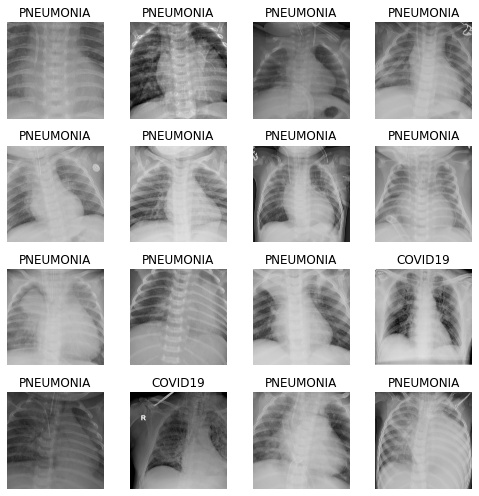

In [ ]:
dataTrain.show_batch(rows=4, figsize=(7,7))

#DO NOT RUN THIS 

###Augmenting The Training Images for COVID19 and NORMAL


In [ ]:
# aug_image_path = {
#   0: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19',
#   1: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL',  
# }
# aug_image_prefix = {
#   0: 'COVID19_AUG',
#   1: 'NORMAL_AUG',  
# }

# number_of_aug_img = 0
# for i, label in enumerate(train.classes):
#   if label == 0 or label == 1:
#     if label == 0:
#       aug_image_counter = 6
#     else:
#       aug_image_counter = 2

#     img = cv2.imread(train.filepaths[i])
#     x = tf.keras.preprocessing.image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     counter = 0
#     for batch in image_gen.flow(x, batch_size= aug_image_counter, save_to_dir=aug_image_path[label], save_prefix= f'{aug_image_prefix[label]}_{i}', save_format="jpg"):
#       number_of_aug_img += 1
#       counter += 1
#       if(number_of_aug_img%200==0): print(number_of_aug_img,"Augmented Images")

#       if(counter >= aug_image_counter):
#         break



200 Augmented Images
400 Augmented Images
600 Augmented Images
800 Augmented Images
1000 Augmented Images
1200 Augmented Images
1400 Augmented Images
1600 Augmented Images
1800 Augmented Images
2000 Augmented Images
2200 Augmented Images
2400 Augmented Images
2600 Augmented Images
2800 Augmented Images
3000 Augmented Images
3200 Augmented Images
3400 Augmented Images
3600 Augmented Images
3800 Augmented Images
4000 Augmented Images
4200 Augmented Images


###Augmenting The Validation Images for COVID19 and NORMAL





In [ ]:
# aug_image_path = {
#   0: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/COVID19',
#   1: '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/NORMAL',  
# }
# aug_image_prefix = {
#   0: 'COVID19_AUG',
#   1: 'NORMAL_AUG',  
# }

# number_of_aug_img = 0
# for i, label in enumerate(validation.classes):
#   if label == 0 or label == 1:
#     if label == 0:
#       aug_image_counter = 6
#     else:
#       aug_image_counter = 2

#     img = cv2.imread(validation.filepaths[i])
#     x = tf.keras.preprocessing.image.img_to_array(img)
#     x = x.reshape((1,) + x.shape)

#     counter = 0
#     for batch in image_gen.flow(x, batch_size= aug_image_counter, save_to_dir=aug_image_path[label], save_prefix= f'{aug_image_prefix[label]}_{i}', save_format="jpg"):
#       number_of_aug_img += 1
#       counter += 1
#       if(number_of_aug_img%200==0): print(number_of_aug_img,"Augmented Images")

#       if(counter >= aug_image_counter):
#         break

In [ ]:
ls  '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/COVID19';

In [ ]:
#ls -lh '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/validation/PNEUMONIA';

###Fetching Augmented X-Ray Image for Training and Validation and Test set


In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 )

train_balanced = data_gen.flow_from_directory(
      train_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=999999
      )

validation_set = data_gen.flow_from_directory(
      validation_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=999999
      )


test_set = data_gen.flow_from_directory(
      test_directory, 
      target_size= TARGET_SIZE,
      color_mode='grayscale',
      batch_size=999999
      )

Found 8349 images belonging to 3 classes.
Found 1028 images belonging to 3 classes.
Found 1299 images belonging to 3 classes.


[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Balanced Training Dataset')]

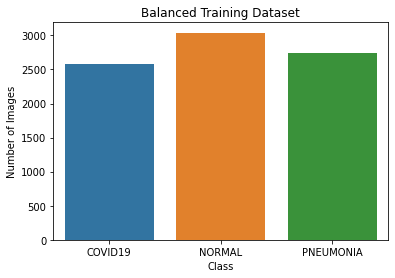

In [ ]:
image_labels = []
for  label in train_balanced.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Balanced Training Dataset', xlabel='Class', ylabel='Number of Images')

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Validation Dataset')]

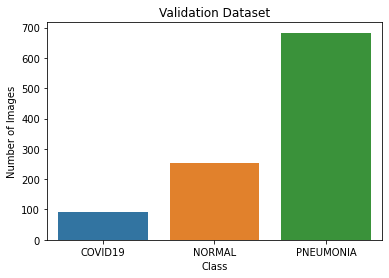

In [ ]:
image_labels = []
for  label in validation_set.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Validation Dataset', xlabel='Class', ylabel='Number of Images')

[Text(0, 0.5, 'Number of Images'),
 Text(0.5, 0, 'Class'),
 Text(0.5, 1.0, 'Test Dataset')]

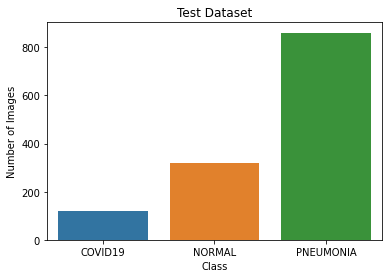

In [ ]:
image_labels = []
for  label in test_set.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Test Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
#TARGET_SIZE = (64, 64)

In [ ]:
#ls '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19'

In [ ]:
X_train = []
y_train = []
X_train, y_train = next(train_balanced)

In [ ]:
X_train.shape, y_train.shape

((8349, 140, 140, 1), (8349, 3))

In [ ]:
X_valid = []
y_valid = []
X_valid, y_valid = next(validation_set)

In [ ]:
X_valid.shape, y_valid.shape

In [ ]:
X_test = []
y_test = []
X_test, y_test = next(test_set)

In [ ]:
X_test.shape, y_test.shape

((1299, 140, 140, 1), (1299, 3))

In [ ]:
len(train_balanced)

1

In [ ]:
#from tqdm import tqdm
#X_train = []
#y_train = []
#for X, y in tqdm(train_balanced, total=len(train_balanced)):
#  print("\nx\n")
#  print(X)
#  print("\ny\n")
#  print(y)
#  X_train.append(X)
#  y_train.append(y)

In [ ]:
# X_train = np.concatenate(X_train)
# y_train = np.concatenate(y_train)
# X_valid = np.concatenate(X_valid)
# y_valid = np.concatenate(y_valid)

Save the **Train** and **validation** array

In [ ]:
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_train', arr=X_train)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_train', arr=y_train)

np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_valid', arr=X_valid)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_valid', arr=y_valid)

np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_test', arr=X_test)
np.save(file = '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_test', arr=y_test)

In [ ]:
ls -lh '/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data'

total 799M
drwx------ 5 root root 4.0K Apr 13 21:42 test/
drwx------ 5 root root 4.0K Apr 15 13:24 train/
drwx------ 5 root root 4.0K Apr 15 14:27 validation/
-rw------- 1 root root  98M Apr 15 17:48 X_test.npy
-rw------- 1 root root 625M Apr 15 17:37 X_train.npy
-rw------- 1 root root  77M Apr 15 17:37 X_valid.npy
-rw------- 1 root root  16K Apr 15 17:48 y_test.npy
-rw------- 1 root root  98K Apr 15 17:37 y_train.npy
-rw------- 1 root root  13K Apr 15 17:37 y_valid.npy


## **Load the Train and Validation array ( on next run Continue from here , no need to run prev code)**

In [10]:
X_train = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_train.npy')
y_train = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_train.npy')
X_valid = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_valid.npy')
y_valid = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_valid.npy')

X_test = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/X_test.npy')
y_test = np.load('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/y_test.npy')

In [11]:
print("Tarin")
print(pd.Series(y_train.argmax(1)).value_counts())
print("\nValidation")
print(pd.Series(y_valid.argmax(1)).value_counts())
print("\nTest")
print(pd.Series(y_test.argmax(1)).value_counts())

Tarin
1    3039
2    2735
0    2575
dtype: int64

Validation
2    683
1    253
0     92
dtype: int64

Test
2    861
1    320
0    118
dtype: int64


<h1>Training CNN</h1>

### Utils

In [9]:
# snipset from :https://datascience.stackexchange.com/a/45166
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [10]:
def model_evaluation(y_pred_train, y_pred_valid,y_pred_test):
  print("Train")
  print(classification_report(y_train.argmax(axis=1), y_pred_train.argmax(axis=1)))

  print("\n***********\nValid")
  print(classification_report(y_valid.argmax(axis=1), y_pred_valid.argmax(axis=1)))

  print("\n***********\nTest")
  print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1))) 


  confusion = pd.crosstab(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)).reindex(columns=range(3)).fillna(0)
  print(confusion)

  sns.heatmap(confusion, annot=True, fmt='.0f')
  plt.xlabel('Predicted')
  plt.ylabel('Actual');

  print("\n")
  confusion['total'] = confusion.sum(1)
  tot_row = confusion.sum(0)
  tot_row.name = 'total'
  confusion = confusion.append(tot_row)
  print(confusion)

## Train a model

In [11]:
from fastai import layers
def build_model(X_train):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=16,
        kernel_size=6,
        activation='relu',
        input_shape=X_train.shape[1:]
    ),
    (Dropout(0.3)),
    keras.layers.Conv2D(
        filters=32,
        kernel_size=3,
        activation='relu'
    ),

     keras.layers.Conv2D(
        filters=64,
        kernel_size=3,
        activation='relu'
    ),
    BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=16,
        activation='relu'
    ),
    keras.layers.Dense(3, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(),f1_m])
  
  return model

In [12]:
# 64, 140, 140, 1)
X_train.shape

(8349, 140, 140, 1)

In [13]:
model = build_model(X_train)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 135, 135, 16)      592       
                                                                 
 dropout (Dropout)           (None, 135, 135, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 133, 133, 32)      4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 131, 131, 64)      18496     
                                                                 
 batch_normalization (BatchN  (None, 131, 131, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 43, 64)       0         
 )                                                      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
tf.test.is_gpu_available()

True

In [16]:
model.fit(X_train, y_train, batch_size=32, epochs=27, validation_data=(X_valid, y_valid))

Epoch 1/27
261/261 [==============================] - 39s 120ms/step - loss: 0.9225 - categorical_accuracy: 0.5965 - f1_m: 0.4037 - val_loss: 1.0533 - val_categorical_accuracy: 0.4436 - val_f1_m: 0.0618
Epoch 2/27
261/261 [==============================] - 30s 116ms/step - loss: 0.7533 - categorical_accuracy: 0.7355 - f1_m: 0.5369 - val_loss: 1.6467 - val_categorical_accuracy: 0.7033 - val_f1_m: 0.6929
Epoch 3/27
261/261 [==============================] - 30s 114ms/step - loss: 0.5698 - categorical_accuracy: 0.8020 - f1_m: 0.6735 - val_loss: 1.3056 - val_categorical_accuracy: 0.7160 - val_f1_m: 0.7183
Epoch 4/27
261/261 [==============================] - 31s 117ms/step - loss: 0.4775 - categorical_accuracy: 0.7424 - f1_m: 0.6864 - val_loss: 1.0442 - val_categorical_accuracy: 0.7189 - val_f1_m: 0.7294
Epoch 5/27
261/261 [==============================] - 30s 113ms/step - loss: 0.3978 - categorical_accuracy: 0.7727 - f1_m: 0.7464 - val_loss: 0.4573 - val_categorical_accuracy: 0.8823 - va

In [17]:
history = model.history.history.copy()
history.keys()

dict_keys(['loss', 'categorical_accuracy', 'f1_m', 'val_loss', 'val_categorical_accuracy', 'val_f1_m'])

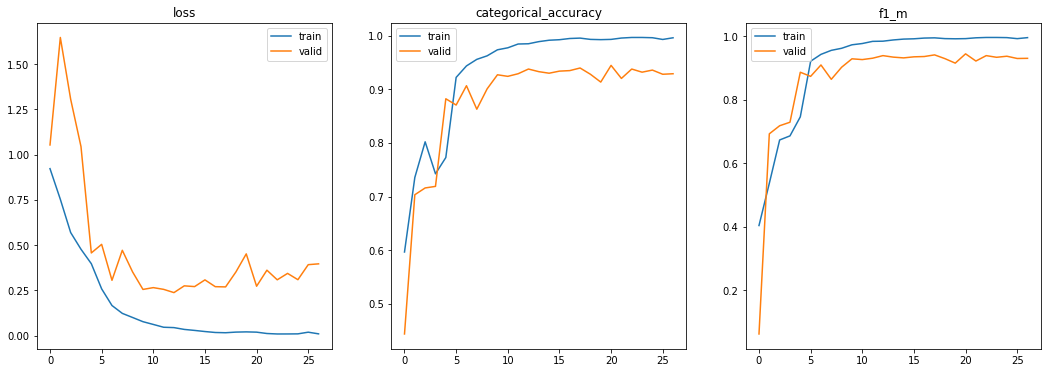

In [21]:
history.keys()
plt.figure(figsize=(18,6))
for i, item in enumerate(['loss', 'categorical_accuracy', 'f1_m']):
  plt.subplot(1,3,i+1)
  plt.plot(history[item], label='train')
  plt.plot(history['val_'+item], label='valid')
  plt.legend()
  plt.title(item)

In [18]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 2s 45ms/step - loss: 0.2987 - categorical_accuracy: 0.9415 - f1_m: 0.9395


[0.29868853092193604, 0.9414934515953064, 0.9394657015800476]

In [19]:
y_pred_train = model.predict(X_train)
y_pred_valid = model.predict(X_valid)
y_pred_test = model.predict(X_test)

Train
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2575
           1       0.99      1.00      1.00      3039
           2       1.00      0.99      0.99      2735

    accuracy                           1.00      8349
   macro avg       1.00      1.00      1.00      8349
weighted avg       1.00      1.00      1.00      8349


***********
Valid
              precision    recall  f1-score   support

           0       0.92      0.91      0.92        92
           1       0.85      0.91      0.88       253
           2       0.96      0.94      0.95       683

    accuracy                           0.93      1028
   macro avg       0.91      0.92      0.92      1028
weighted avg       0.93      0.93      0.93      1028


***********
Test
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       118
           1       0.88      0.90      0.89       320
           2       0.96      0.9

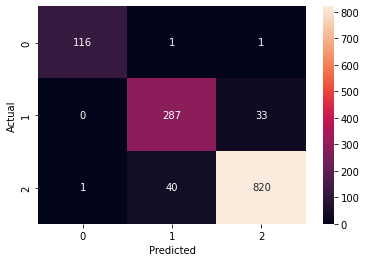

In [20]:
model_evaluation(y_pred_train, y_pred_valid,y_pred_test)

In [22]:
confusion = pd.crosstab(y_test.argmax(axis=1), y_pred_test.argmax(axis=1)).reindex(columns=range(3)).fillna(0)
confusion


col_0,0,1,2
row_0,,,
0,116,1,1
1,0,287,33
2,1,40,820


In [23]:
confusion['total'] = confusion.sum(1)
tot_row = confusion.sum(0)
tot_row.name = 'total'
confusion = confusion.append(tot_row)
confusion

col_0,0,1,2,total
row_0,,,,
0,116,1,1,118
1,0,287,33,320
2,1,40,820,861
total,117,328,854,1299


## Taking another shot on tarining to enhance it

In [24]:
from fastai import layers
def build_model2(hp):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('filters-1', 8, 32, step=4),
        kernel_size=6,
        activation='relu',
        input_shape=X_train.shape[1:]
    ),
    (Dropout(0.3)),
    keras.layers.Conv2D(
        filters=hp.Int('filters-2', 8, 64, step=4),
        kernel_size=3,
        activation='relu'
    ),
     keras.layers.Conv2D(
        filters=hp.Int('filters-3', 8, 128, step=4),
        kernel_size=3,
        activation='relu'
    ),
    BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=16,
        activation='relu'
    ),
    keras.layers.Dense(3, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5, 1e-6])),
              loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(),f1_m])
  
  return model

In [27]:
es = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_categorical_accuracy')

In [31]:
#rm -rf untitled_project

In [28]:
kt.Hyperband

keras_tuner.tuners.hyperband.Hyperband

In [34]:
tuner = kt.Hyperband(build_model2, objective='val_categorical_accuracy')
tuner.search_space_summary()
# 5x5x4

Search space summary
Default search space size: 4
filters-1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 4, 'sampling': None}
filters-2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 4, 'sampling': None}
filters-3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 4, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}


In [35]:
tuner = kt.RandomSearch(build_model2, objective='val_categorical_accuracy', max_trials=7)

tuner.search(X_train, y_train, batch_size=32, epochs=27, validation_data=(X_valid, y_valid), callbacks=[es])

Trial 7 Complete [00h 14m 44s]
val_categorical_accuracy: 0.8978599309921265

Best val_categorical_accuracy So Far: 0.9533073902130127
Total elapsed time: 00h 48m 26s
INFO:tensorflow:Oracle triggered exit


In [36]:
tuner2 = kt.RandomSearch(build_model2, objective='val_categorical_accuracy', max_trials=7, executions_per_trial=7)


INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [37]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
filters-1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 32, 'step': 4, 'sampling': None}
filters-2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 64, 'step': 4, 'sampling': None}
filters-3 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 4, 'sampling': None}
learning_rate (Choice)
{'default': 0.001, 'conditions': [], 'values': [0.001, 0.0001, 1e-05, 1e-06], 'ordered': True}


In [40]:
tuner.get_best_hyperparameters()[0].values

{'filters-1': 28, 'filters-2': 64, 'filters-3': 64, 'learning_rate': 0.0001}

In [44]:
tuner.get_best_models()[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 135, 135, 28)      1036      
                                                                 
 dropout (Dropout)           (None, 135, 135, 28)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 133, 133, 64)      16192     
                                                                 
 conv2d_2 (Conv2D)           (None, 131, 131, 64)      36928     
                                                                 
 batch_normalization (BatchN  (None, 131, 131, 64)     256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 43, 43, 64)       0         
 )                                                      

In [42]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
filters-1: 28
filters-2: 64
filters-3: 64
learning_rate: 0.0001
Score: 0.9533073902130127
Trial summary
Hyperparameters:
filters-1: 12
filters-2: 60
filters-3: 28
learning_rate: 0.001
Score: 0.929961085319519
Trial summary
Hyperparameters:
filters-1: 24
filters-2: 12
filters-3: 100
learning_rate: 0.001
Score: 0.9134241342544556
Trial summary
Hyperparameters:
filters-1: 28
filters-2: 40
filters-3: 36
learning_rate: 1e-05
Score: 0.8978599309921265
Trial summary
Hyperparameters:
filters-1: 32
filters-2: 32
filters-3: 56
learning_rate: 1e-06
Score: 0.8190661668777466
Trial summary
Hyperparameters:
filters-1: 16
filters-2: 12
filters-3: 60
learning_rate: 1e-05
Score: 0.7402724027633667
Trial summary
Hyperparameters:
filters-1: 20
filters-2: 20
filters-3: 72
learning_rate: 1e-06
Score: 0.7324903011322021


In [45]:
tuner.get_best_models()[0].evaluate(X_test, y_test)

41/41 [==============================] - 3s 67ms/step - loss: 0.1971 - categorical_accuracy: 0.9384 - f1_m: 0.9376


[0.1970674991607666, 0.9384141564369202, 0.9375821352005005]

In [46]:
y_pred_train2 = tuner.get_best_models()[0].predict(X_train)
y_pred_valid2 = tuner.get_best_models()[0].predict(X_valid)
y_pred_test2 = tuner.get_best_models()[0].predict(X_test)

Train
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      2575
           1       0.98      0.98      0.98      3039
           2       0.97      0.99      0.98      2735

    accuracy                           0.98      8349
   macro avg       0.98      0.98      0.98      8349
weighted avg       0.98      0.98      0.98      8349


***********
Valid
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        92
           1       0.89      0.93      0.91       253
           2       0.98      0.96      0.97       683

    accuracy                           0.95      1028
   macro avg       0.94      0.95      0.95      1028
weighted avg       0.95      0.95      0.95      1028


***********
Test
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       118
           1       0.87      0.90      0.89       320
           2       0.96      0.9

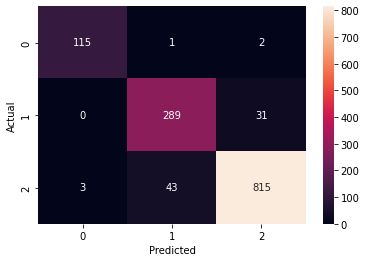

In [47]:
model_evaluation(y_pred_train2, y_pred_valid2,y_pred_test2)

------

# Pretrained Models

### Rasnet50

In [73]:
rasnet = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    pooling='max',
    input_shape=(X_train.shape[1], X_train.shape[2], 3),

)

In [74]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
x = tf.keras.layers.Conv2D(3, (3,3), padding='same')(input_layer)
x = rasnet(x)
out = tf.keras.layers.Dense(3, activation='softmax')(x)
model = tf.keras.models.Model(inputs=input_layer, outputs=out)

In [75]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 140, 140, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 140, 140, 3)       30        
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,593,889
Trainable params: 23,540,769
Non-trainable params: 53,120
_________________________________________________________________


In [76]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(),f1_m])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [77]:
es = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_categorical_accuracy')

In [78]:
model.fit(X_train, y_train, batch_size=32, epochs=27, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/27
261/261 [==============================] - 104s 364ms/step - loss: 0.7590 - categorical_accuracy: 0.8361 - f1_m: 0.8362 - val_loss: 178.5960 - val_categorical_accuracy: 0.0895 - val_f1_m: 0.0871
Epoch 2/27
261/261 [==============================] - 94s 358ms/step - loss: 0.0944 - categorical_accuracy: 0.9726 - f1_m: 0.9725 - val_loss: 265.3476 - val_categorical_accuracy: 0.0895 - val_f1_m: 0.0871
Epoch 3/27
261/261 [==============================] - 94s 358ms/step - loss: 0.0296 - categorical_accuracy: 0.9895 - f1_m: 0.9895 - val_loss: 92.1172 - val_categorical_accuracy: 0.0973 - val_f1_m: 0.0930
Epoch 4/27
261/261 [==============================] - 94s 359ms/step - loss: 0.0201 - categorical_accuracy: 0.9928 - f1_m: 0.9928 - val_loss: 9.8356 - val_categorical_accuracy: 0.4893 - val_f1_m: 0.4956
Epoch 5/27
261/261 [==============================] - 93s 358ms/step - loss: 0.0139 - categorical_accuracy: 0.9957 - f1_m: 0.9954 - val_loss: 0.8097 - val_categorical_accuracy: 0.847

In [79]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 4s 106ms/step - loss: 0.4734 - categorical_accuracy: 0.9253 - f1_m: 0.9250


[0.4733510911464691, 0.9253271818161011, 0.9250240921974182]

In [80]:
y_pred_train3 = model.predict(X_train)
y_pred_valid3 = model.predict(X_valid)
y_pred_test3 = model.predict(X_test)

In [81]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 140, 140, 1)]     0         
                                                                 
 conv2d_5 (Conv2D)           (None, 140, 140, 3)       30        
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense_4 (Dense)             (None, 3)                 6147      
                                                                 
Total params: 23,593,889
Trainable params: 23,540,769
Non-trainable params: 53,120
_________________________________________________________________


Train
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2575
           1       1.00      1.00      1.00      3039
           2       1.00      0.99      1.00      2735

    accuracy                           1.00      8349
   macro avg       1.00      1.00      1.00      8349
weighted avg       1.00      1.00      1.00      8349


***********
Valid
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        92
           1       0.92      0.90      0.91       253
           2       0.97      0.94      0.96       683

    accuracy                           0.94      1028
   macro avg       0.89      0.95      0.91      1028
weighted avg       0.94      0.94      0.94      1028


***********
Test
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       118
           1       0.87      0.88      0.88       320
           2       0.96      0.9

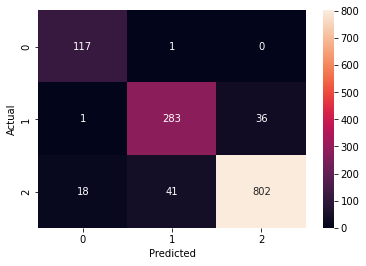

In [82]:
model_evaluation(y_pred_train3, y_pred_valid3,y_pred_test3)

### EfficientNetB0

In [1]:
effnet = tf.keras.applications.EfficientNetB0(
    include_top=False,
    weights="imagenet",
    pooling='max',
    input_shape=(X_train.shape[1], X_train.shape[2], 3),

)

NameError: ignored

In [61]:
input_layer = tf.keras.layers.Input(shape=X_train.shape[1:])
x = tf.keras.layers.Conv2D(3, (3,3), padding='same')(input_layer)
x = effnet(x)
out = tf.keras.layers.Dense(3, activation='softmax')(x)
model4 = tf.keras.models.Model(inputs=input_layer, outputs=out)

In [72]:
model4.summary()

NameError: ignored

In [63]:
model4.compile(optimizer=keras.optimizers.Adam(lr=0.00001),
              loss='categorical_crossentropy',
              metrics=[keras.metrics.CategoricalAccuracy(),f1_m])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
es = tf.keras.callbacks.EarlyStopping(patience=5, monitor='val_categorical_accuracy')

In [65]:
model4.fit(X_train, y_train, batch_size=32, epochs=27, validation_data=(X_valid, y_valid), callbacks=[es])

Epoch 1/27
261/261 [==============================] - 88s 287ms/step - loss: 0.8939 - categorical_accuracy: 0.6968 - f1_m: 0.6945 - val_loss: 1.9694 - val_categorical_accuracy: 0.2023 - val_f1_m: 0.1930
Epoch 2/27
261/261 [==============================] - 71s 272ms/step - loss: 0.3964 - categorical_accuracy: 0.8609 - f1_m: 0.8606 - val_loss: 2.7207 - val_categorical_accuracy: 0.2315 - val_f1_m: 0.2206
Epoch 3/27
261/261 [==============================] - 71s 272ms/step - loss: 0.3024 - categorical_accuracy: 0.8987 - f1_m: 0.8982 - val_loss: 1.0849 - val_categorical_accuracy: 0.6449 - val_f1_m: 0.6415
Epoch 4/27
261/261 [==============================] - 71s 272ms/step - loss: 0.2336 - categorical_accuracy: 0.9206 - f1_m: 0.9215 - val_loss: 0.5171 - val_categorical_accuracy: 0.8278 - val_f1_m: 0.8286
Epoch 5/27
261/261 [==============================] - 72s 274ms/step - loss: 0.2032 - categorical_accuracy: 0.9310 - f1_m: 0.9310 - val_loss: 0.5451 - val_categorical_accuracy: 0.8113 - va

KeyboardInterrupt: ignored

In [ ]:
model4.evaluate(X_test, y_test)

In [ ]:
y_pred_train4 = model4.predict(X_train)
y_pred_valid4 = model4.predict(X_valid)
y_pred_test4 = model4.predict(X_test)

In [ ]:
model_evaluation(y_pred_train4, y_pred_valid4,y_pred_test4)

In [ ]:
# for i in range(len(test_data)):
#   image = test_data[i]
#   label = np.argmax(test_data[i])
#   predict(model, image, label)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:43: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = getattr(asarray(obj), method)(*args, **kwds)


ValueError: ignored

In [ ]:
#model.fit(train_balanced, validation_data=test_dataset, epochs=1)

  7/159 [>.............................] - ETA: 28:01 - loss: 1.0990 - accuracy: 0.3326

KeyboardInterrupt: ignored

# Final Training

In [ ]:
def build_model(hp):  
  model = keras.models.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=8, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=8, max_value=128, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=8, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3,'constant', 'invscaling', 'adaptive'])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
6*6*2*26 * 5 * 5 / 24

1950.0

In [ ]:
image_labels = []
for  label in  test.classes:
  image_labels.append(categories_dict[label])

df = pd.DataFrame(image_labels)
sns.countplot(x=0, data= df).set(Title='Test Dataset', xlabel='Class', ylabel='Number of Images')

In [ ]:
# def cnn_model():
# # CNN Based Model in Keras
#   model = keras.Sequential([
#         keras.Input(shape=(140,140,1), name='Original_Images'),
#         keras.layers.Conv2D(input_shape=(140,140,1), filters=32, kernel_size=11, 
#                             strides=1, activation='relu', name='Conv1'),
#         keras.layers.Conv2D(input_shape=(130,130,32), filters=32, kernel_size=11, 
#                             strides=1, activation='relu', name='Conv2'),
#         keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
#         keras.layers.Conv2D(input_shape=(58,58,32), filters=64, kernel_size=9, 
#                             strides=1, activation='relu', name='Conv3'),
#         keras.layers.MaxPool2D(pool_size=(5, 5), strides=2),
#         keras.layers.Conv2D(input_shape=(23,23,64), filters=128, kernel_size=8, 
#                             strides=1, activation='relu', name='Conv4'),
#         keras.layers.Conv2D(input_shape=(16,16,128), filters=256, kernel_size=9, 
#                             strides=1, activation='relu', name='Conv5'),
#         keras.layers.Conv2D(input_shape=(8,8,256), filters=256, kernel_size=8, 
#                             strides=1, activation='relu', name='Conv6'),    

#         keras.layers.Flatten(),
#         keras.layers.Dense(8, activation=tf.keras.activations.relu, name='Dense'),
#         keras.layers.Dense(3, activation="softmax")
#     ])
#   opt = keras.optimizers.Adam(learning_rate=0.005)
#   model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
#               metrics=[keras.metrics.CategoricalAccuracy()])
#   return model

  

In [ ]:
# model = cnn_model()

In [ ]:
# keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# hist = model.fit(
#     train_balanced
# )

In [ ]:
# score = model.evaluate(test_images, test_labels, verbose=0)
# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [ ]:
# def show_image(img, label, guess):
#   plt.figure()
#   plt.imshow(img, cmap=plt.cm.binary)
#   plt.title("Excpected: " + label)
#   plt.xlabel("Guess: " + guess)
#   plt.colorbar()
#   plt.grid(False)
#   plt.show()

In [ ]:
# def predict(model, image, correct_label):
#   prediction = model.predict(np.array([image]))
#   print(prediction)
#   predicted_class = categories_dict[np.argmax(prediction)]
#   show_image(image, categories_dict[correct_label], predicted_class)

In [ ]:
# for i in range(len(test_images)):
#   image = test_images[i]
#   label = np.argmax(test_labels[i])
#   predict(model, image, label)

**REMOVES THE AUGMENTED IMAGES**



In [ ]:
def remove_aug(path):
  files= glob.glob(path, recursive=True)
  for f in files:
      try:
          os.remove(f)
      except OSError as e:
          print("Error: %s : %s" % (f, e.strerror))

remove_aug('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/COVID19/COVID19_AUG*.jpg')
remove_aug('/content/drive/My Drive/Comp 478 - Project/Chest X-ray (Covid-19 & Pneumonia)/Data/train/NORMAL/NORMAL_AUG*.jpg')